In [25]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import *

In [2]:
spark = SparkSession\
    .builder\
    .appName("lecture-12-app")\
    .master("local[8]").getOrCreate()

In [3]:
# user defined functions
# caching
# broadcast
# complex schema

In [4]:
from pyspark.sql.functions import udf 

In [6]:
df = spark.read.csv('../data/hm/exam/transactions.csv', header=True, inferSchema=True)

In [7]:
df.show(5)

+-------------------+--------------------+----------+--------------------+----------------+
|              t_dat|         customer_id|article_id|               price|sales_channel_id|
+-------------------+--------------------+----------+--------------------+----------------+
|2019-03-01 00:00:00|0002db27a1651998a...| 688873010|0.033881355932203386|               1|
|2019-03-01 00:00:00|0031a3ee9e817a626...| 562245046|0.030508474576271188|               2|
|2019-03-01 00:00:00|00daef2733086cfb0...| 715124001|0.020322033898305086|               2|
|2019-03-01 00:00:00|0101910585fb22dc4...| 698276001|0.050830508474576264|               2|
|2019-03-01 00:00:00|012cfe5d988e9635b...| 700345001| 0.04794915254237288|               2|
+-------------------+--------------------+----------+--------------------+----------------+


In [35]:
spark.sparkContext.uiWebUrl

'http://10.11.13.136:4040'

In [8]:
agg = df.select(F.min(F.col('price')), F.max(F.col('price'))).toPandas()

In [9]:
agg

,min(price),max(price)
0,0.000322,0.50678


In [10]:
pdf = df.select('price').toPandas()

<AxesSubplot:>

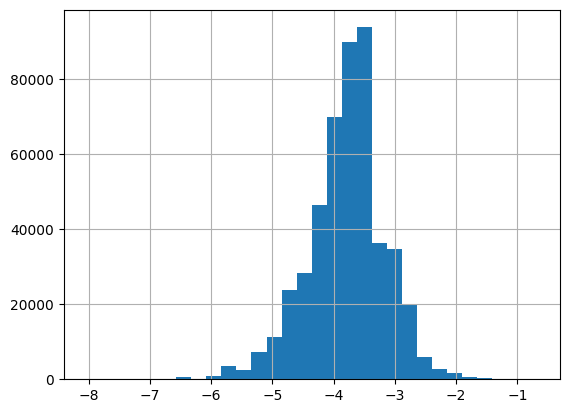

In [15]:
import numpy as np
np.log(pdf['price']).hist(bins=30)

In [17]:
from math import sqrt

In [23]:
pdf['price'].apply(lambda x: sqrt(x) if x > 0.05 else 0)

0         0.000000
1         0.000000
2         0.000000
3         0.225456
4         0.000000
            ...   
482184    0.000000
482185    0.000000
482186    0.000000
482187    0.000000
482188    0.000000
Name: price, Length: 482189, dtype: float64

In [31]:
@udf(FloatType())
def log_1p(x):
    return x+1


In [32]:
df.printSchema()

root
 |-- t_dat: timestamp (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- article_id: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- sales_channel_id: integer (nullable = true)
 |-- log1p_price: float (nullable = true)


In [33]:
df = df.withColumn("log1p_price", log_1p(df.price))

In [37]:
df.withColumn("log1p_price", log_1p(df.price)).select(F.sum('log1p_price')).show()

+-----------------+
| sum(log1p_price)|
+-----------------+
|495657.2250497341|
+-----------------+


In [34]:
df.show()

+-------------------+--------------------+----------+--------------------+----------------+-----------+
|              t_dat|         customer_id|article_id|               price|sales_channel_id|log1p_price|
+-------------------+--------------------+----------+--------------------+----------------+-----------+
|2019-03-01 00:00:00|0002db27a1651998a...| 688873010|0.033881355932203386|               1|  1.0338813|
|2019-03-01 00:00:00|0031a3ee9e817a626...| 562245046|0.030508474576271188|               2|  1.0305085|
|2019-03-01 00:00:00|00daef2733086cfb0...| 715124001|0.020322033898305086|               2|  1.0203221|
|2019-03-01 00:00:00|0101910585fb22dc4...| 698276001|0.050830508474576264|               2|  1.0508305|
|2019-03-01 00:00:00|012cfe5d988e9635b...| 700345001| 0.04794915254237288|               2|  1.0479492|
|2019-03-01 00:00:00|0136908b67875e99e...| 576775006| 0.01523728813559322|               2|  1.0152373|
|2019-03-01 00:00:00|01c51fc769136d663...| 685812002|0.033881355

In [38]:
# cache | persist

In [39]:
df = spark.read.csv('../data/hm/raw/transactions_train.csv', header=True, inferSchema=True)

In [40]:
df_ = df.select('price')

In [41]:
df_ = df_.cache()

In [42]:
df_.select(F.sum('price')).show()

+-----------------+
|       sum(price)|
+-----------------+
|884645.9740490204|
+-----------------+


In [43]:
df_.select(F.sum('price')).show()

+-----------------+
|       sum(price)|
+-----------------+
|884645.9740490204|
+-----------------+


In [44]:
df_.select(F.sum('price')).show()

+-----------------+
|       sum(price)|
+-----------------+
|884645.9740490204|
+-----------------+


In [45]:
df_ = df_.unpersist()

In [46]:
df_.select(F.sum('price')).show()

+-----------------+
|       sum(price)|
+-----------------+
|884645.9740490204|
+-----------------+


In [ ]:
# F.broadcast()
# MapType() ArrayType() 